In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
sns.set_theme(style='whitegrid',rc={"figure.figsize":(5,5)})

In [ ]:
sns.set_palette('hls',4)

In [ ]:
sns.hls_palette(8)

[(0.86, np.float64(0.3712), 0.33999999999999997),
 (0.86, np.float64(0.7612000000000001), 0.33999999999999997),
 (np.float64(0.5688000000000001), 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, np.float64(0.5012000000000001)),
 (0.33999999999999997, np.float64(0.8287999999999999), 0.86),
 (0.33999999999999997, np.float64(0.43879999999999986), 0.86),
 (np.float64(0.6311999999999998), 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, np.float64(0.6987999999999996))]

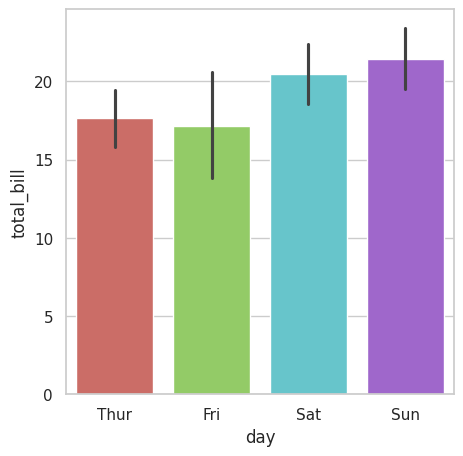

In [ ]:
sns.barplot(data=df, x='day', y='total_bill',estimator='mean',hue='day',legend=None)
plt.show()

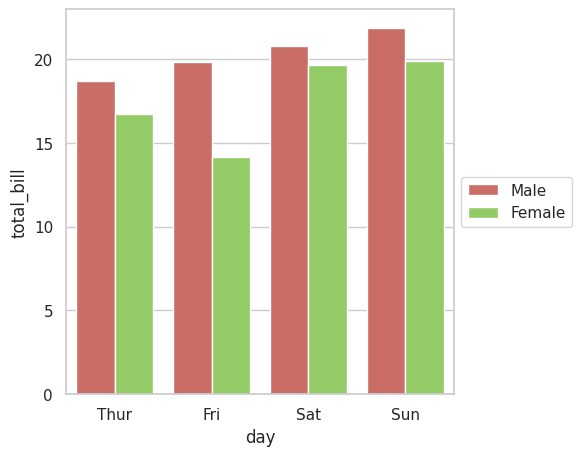

In [ ]:
sns.barplot(data=df, x='day', y='total_bill',estimator='mean',hue='sex',errorbar=None)
plt.legend(loc='center left',bbox_to_anchor=(1,0.5))

In [ ]:
df2=df.pivot_table(index='day',columns='sex',values='total_bill',aggfunc='mean',observed=False)
df2

sex,Male,Female
day,,
Thur,18.714667,16.715312
Fri,19.857000,14.145556
Sat,20.802542,19.680357
Sun,21.887241,19.872222


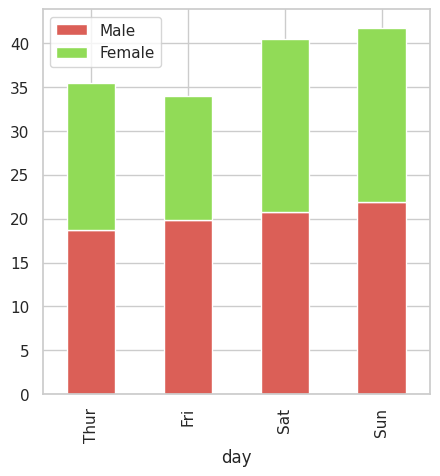

In [ ]:
df2.plot.bar(stacked=True)
plt.legend(loc='upper left',bbox_to_anchor=(0,1))
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df=sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


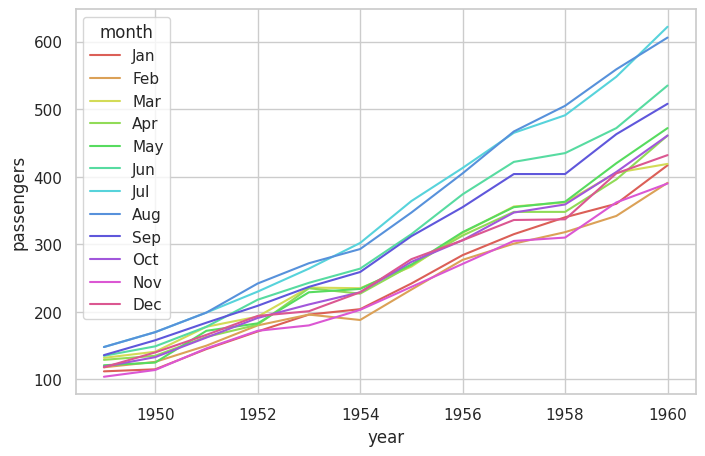

In [ ]:
sns.set_theme(style='whitegrid',rc={"figure.figsize":(8,5)})
sns.set_palette('hls',12)

sns.lineplot(data=df, x='year', y='passengers',hue='month')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('seoul_temp.csv')
df.head()

,date,temp,precip,sunshine,humidity,max_gust
0,20231231,2.1,4.7,0.6,95.5,8.3
1,20231230,0.6,13.1,0.0,92.0,6.9
2,20231229,1.3,0.0,1.8,71.0,5.7
3,20231228,1.2,0.0,8.1,69.5,8.0
4,20231227,1.5,0.0,8.2,76.6,4.7


In [ ]:
df['month']=(df.date - 20230000)//100
df.head()

,date,temp,precip,sunshine,humidity,max_gust,month
0,20231231,2.1,4.7,0.6,95.5,8.3,12
1,20231230,0.6,13.1,0.0,92.0,6.9,12
2,20231229,1.3,0.0,1.8,71.0,5.7,12
3,20231228,1.2,0.0,8.1,69.5,8.0,12
4,20231227,1.5,0.0,8.2,76.6,4.7,12


In [ ]:
tmp=df.groupby('month').mean()
rank=tmp['temp'].rank()-1
rank=rank.astype(int).to_list()
rank

[0, 2, 4, 5, 7, 8, 10, 11, 9, 6, 3, 1]

In [ ]:
sns.set_theme(style='whitegrid',rc={"figure.figsize":(7,5)})
mycolor= sns.color_palette('bwr',12)
mycolor=pd.Series(mycolor)[rank].to_list()

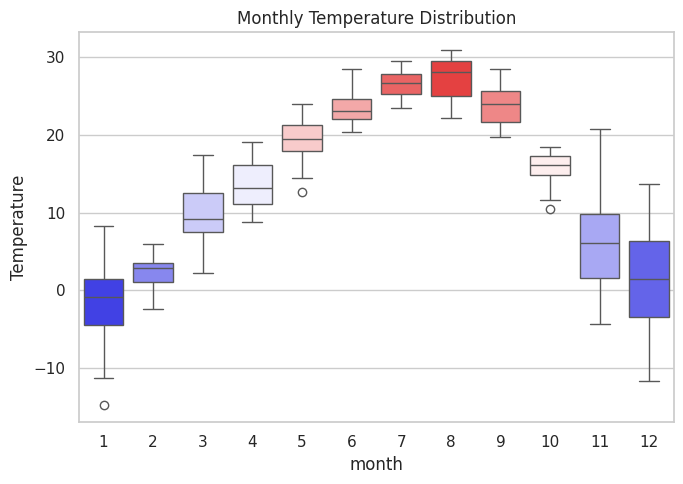

In [ ]:
sns.boxplot(data=df, x='month', y='temp',hue='month',legend=None,
            palette=mycolor).set(title="Monthly Temperature Distribution")
plt.ylabel('Temperature')
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('crimeRatesByState2005.csv')
df.head()

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft,population
0,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4545049
1,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,669488
2,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,5974834
3,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2776221
4,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8,35795255


<Axes: xlabel='murder', ylabel='burglary'>

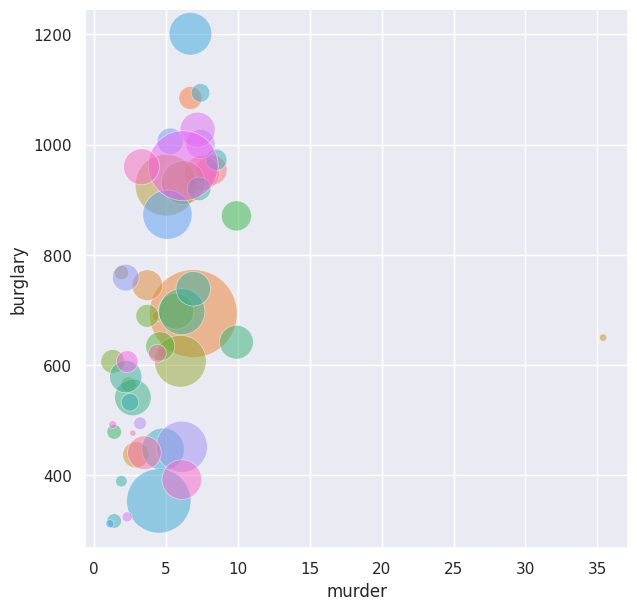

In [ ]:
sns.set_theme(rc={"figure.figsize":(7,7)})
sns.scatterplot(data=df, x='murder', y='burglary',size='population',sizes=(20,4000),hue='state',alpha=0.5,legend=False)

(0.0, 12.0)

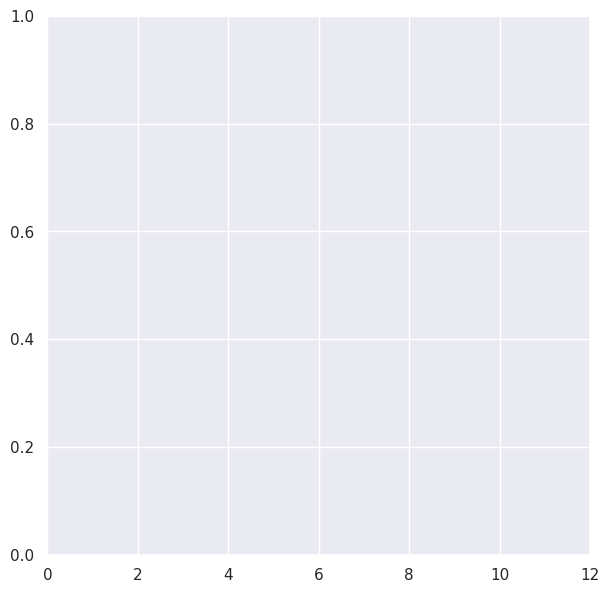

In [ ]:
plt.xlim(0,12)


In [ ]:
for i in range(0,df.shape[0]):
  plt.text(x=df.murder[i], y=df.burglary[i],s=df.state[i],
           horizontalalignment='center',size='small',color='dimgray')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
dict1={0:'died',1:'survived'}
df=df.replace({'survived':dict1})
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,died,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,survived,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,survived,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,survived,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,died,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
props=lambda key:{'color':'lightgreen' if 'survived' in key else 'yellow'}

(<Figure size 640x480 with 3 Axes>,
 {('female', 'survived'): (0.0,
   np.float64(0.0),
   0.3506597204772992,
   np.float64(0.7395729733161224)),
  ('female', 'died'): (0.0,
   np.float64(0.7428952324523349),
   0.3506597204772992,
   np.float64(0.2571047675476649)),
  ('male', 'survived'): (0.3556348448554087,
   np.float64(0.0),
   0.6443651551445913,
   np.float64(0.18828054376802913)),
  ('male', 'died'): (0.3556348448554087,
   np.float64(0.19160280290424175),
   0.6443651551445913,
   np.float64(0.8083971970957582))})

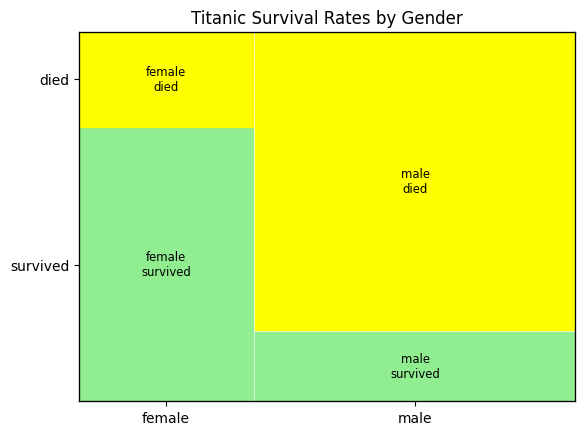

In [ ]:
mosaic(data=df.sort_values('sex'), index=['sex','survived'], properties=props,
                           axes_label=True,title="Titanic Survival Rates by Gender")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
flights=sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
df=flights.pivot_table(index='month',columns='year',values='passengers',aggfunc='mean',observed=False)
df.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0


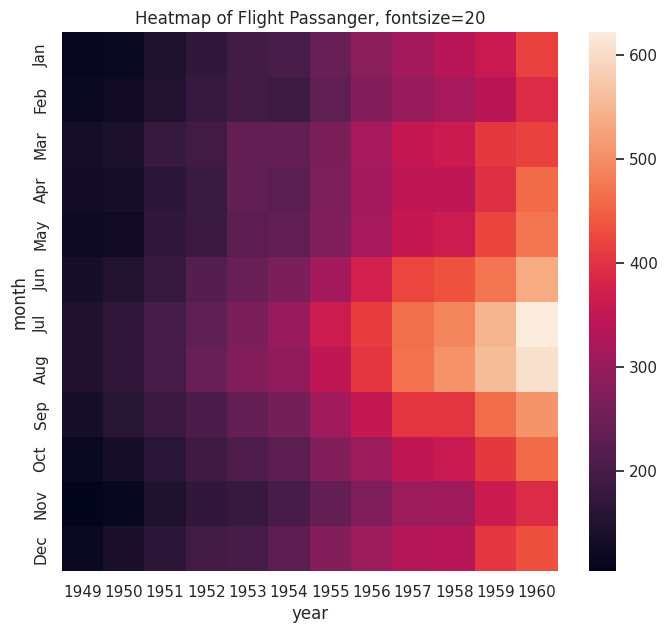

In [ ]:
sns.set_theme(rc={'figure.figsize':(8,7)})
sns.heatmap(df).set_title('Heatmap of Flight Passanger, fontsize=20')
plt.show()

In [ ]:
!pip install plotly

In [ ]:
!pip uninstall -y kaleido
!pip install kaleido==0.2.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.2 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
import matplotlib.image as mping
import kaleido

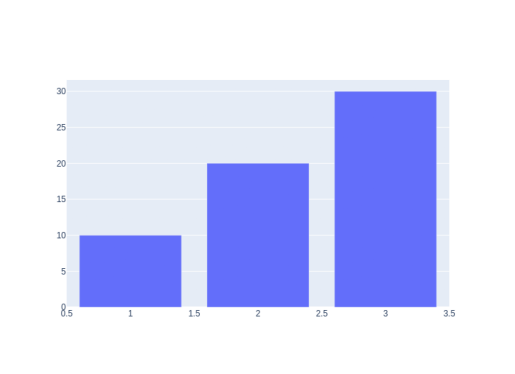

In [ ]:
fig=go.Figure(data=go.Bar(x=[1,2,3], y =[10,20,30]))
fig.write_image("test.png")
plt.imshow(mping.imread('test.png'))
plt.axis('off')
plt.show()

In [ ]:
def radar(df,fills,min_max,title=''):
  fig=go.Figure()
  categories=df.columns.to_list()
  categories.append(categories[0])
  i=0
  while(i<len(df)):
    scores=df.iloc[i,:].to_list()
    scores.append(scores[0])
    fig.add_trace(go.Scatterpolar(
        r=scores,
        theta=categories,
        fill=fills[i],
        name=df.index[i]
    ))
    i+=1

    fig.update_layout(
      polar_radialaxis_visible=True,
      polar_radialaxis_range=min_max,
      showlegend=True,
      margin_t=50,
      margin_l=100,
      margin_r=100,
      margin_b=25,
      width=700,
      height=700,
      title_text=title,
      title_font_size=30,
      font_size=20)



  plt.axis('off')
  fig.write_image('radar.png')
  plt.imshow(mping.imread('radar.png'))
  plt.show()

In [ ]:
df=pd.DataFrame({
    'Kor':[72,70,90,60,66],
    'Eng':[84,85,95,70,85],
    'Math':[71,40,88,80,75],
    'Sci':[83,80,91,90,70],
    'Phy':[60,60,60,70,50]
})
df.index=['Avg','John','Tom','Smith','Grace']
df

,Kor,Eng,Math,Sci,Phy
Avg,72,84,71,83,60
John,70,85,40,80,60
Tom,90,95,88,91,60
Smith,60,70,80,90,70
Grace,66,85,75,70,50


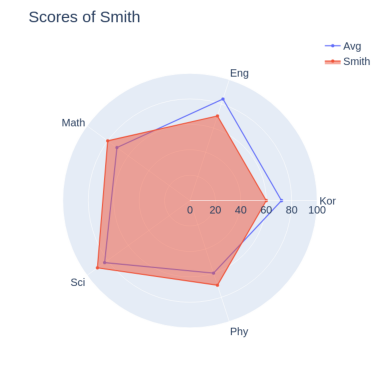

In [ ]:
fills=[None,'toself']
radar(df=df.iloc[[0,3],:],
      fills=fills,
      min_max=[0,100],
      title='Scores of Smith')

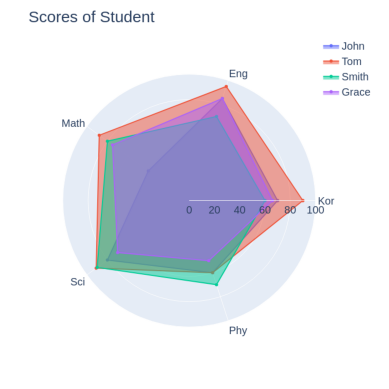

In [ ]:
fills=['toself','toself','toself','toself']
radar(df=df.iloc[1:,:],
       fills=fills,
       min_max=[0,100],
       title="Scores of Student")

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('GNI2014.csv')
df.head()

,iso3,country,continent,population,GNI
0,BMU,Bermuda,North America,67837,106140
1,NOR,Norway,Europe,4676305,103630
2,QAT,Qatar,Asia,833285,92200
3,CHE,Switzerland,Europe,7604467,88120
4,MAC,"Macao SAR, China",Asia,559846,76270


In [ ]:
fig=px.treemap(data_frame=df,
               path=['continent','iso3'],
               values='population',
               color='GNI',
               color_continuous_scale='Bluyl')
fig.show()